## Final Project Submission

Please fill out:
* Student name: Grace Njeri Ndura
* Student pace: Full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


MICROSOFT MOVIE ANALYSIS

BUSINESS PROBLEM.

Microsoft want to create a new movie studio. I need to analyze and explore what type of films are doing the best in the Box Office.

BUSINESS QUESTIONS TO ANSWER.

1. Which movies are the most profitable.
2. Which movie genres are most commonly produced
3. Which is the best time to release a movie.

IMPORTING LIBRARIES

In [2]:
# Your code here - remember to use markdown cells for comments as well!
#importing libraries
import pandas as pd
import csv
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

READING THE DATASET

In [3]:

#Reading the dataset bomovies
df = pd.read_csv(r'C:\Users\Hp\Desktop\microsoftmovie\zippedData\bomovies\Dataset1.csv')
df_reviews = pd.read_csv(r'C:\Users\Hp\Desktop\microsoftmovie\zippedData\rt.reviews.tsv\rt.reviews.tsv', sep='\t',  encoding='latin1')
df_movie_info = pd.read_csv(r"C:\Users\Hp\Desktop\microsoftmovie\zippedData\rt.movie_info.tsv\rt.movie_info.tsv", sep='\t')
df_movie_budget= pd.read_csv(r"C:\Users\Hp\Desktop\microsoftmovie\zippedData\tn.movie_budgets.csv\tn.movie_budgets.csv")
df_db_movies= pd.read_csv(r'C:\Users\Hp\Desktop\microsoftmovie\zippedData\tmdb.movies.csv\tmdb.movies.csv')
#df.head(100)
df_movie_info
# print(df.describe())
# print(df.isnull().sum())

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


CONNECTING TO THE DATABASE

In [4]:
#connecting to the database im.db
conn = sqlite3.connect(r'C:\Users\Hp\Desktop\microsoftmovie\zippedData\im.db\im.db')
cur=conn.cursor()

In [5]:
#combining the table movie_basics and movie_ratings using movie_id
q = """
SELECT *
  FROM movie_basics
  JOIN movie_ratings 
  USING (movie_id)
;
"""
pd.read_sql(q,conn).head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


CLEANING MOVIE BUDGET DATA.

Checking for NAN values and duplicates  in the Movie Budget Data set. 

In [6]:
print(df_movie_budget.isnull().sum())

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64


In [7]:
df_movie_budget.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5777    False
5778    False
5779    False
5780    False
5781    False
Length: 5782, dtype: bool

The movie_budget has no duplicates.

QUESTION 1. THE MOST PROFITABLE MOVIES

To solve this, i use the df_movie_budget. Removing the dollars signs and commas in the columns: production_budget ,domestic_gross and worldwide_gross to change them into integers.

In [8]:
df_movie_budget['production_budget'] = pd.to_numeric(df_movie_budget['production_budget'].astype(str).str.replace('$','').str.replace(',',''))
df_movie_budget['domestic_gross'] = pd.to_numeric(df_movie_budget['domestic_gross'].astype(str).str.replace('$','').str.replace(',',''))
df_movie_budget['worldwide_gross'] = pd.to_numeric(df_movie_budget['worldwide_gross'].astype(str).str.replace('$','').str.replace(',',''))
df_movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


Calucating the profit and profit margin to see which movie is profitable.

In [9]:
# Calculate profit
df_movie_budget['profit'] = df_movie_budget['worldwide_gross'] - df_movie_budget['production_budget']

# Calculate profit margin
df_movie_budget['profit_margin'] = (df_movie_budget['profit'] / df_movie_budget['worldwide_gross'])
df_movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_margin
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,0.846921
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,0.607331
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-1.337036
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,0.764364
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,0.759251


In [10]:
df_movie_budget['release_date'] = pd.to_datetime(df_movie_budget['release_date'])

# Now extract the year
df_movie_budget['Year'] = df_movie_budget['release_date'].dt.year
df_movie_budget
#getting the latest year
latest_year = df_movie_budget['release_date'].dt.year.max()
print("Latest year in the dataset:", latest_year)

Latest year in the dataset: 2020


In [11]:
df_movie_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_margin,Year
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2351345279,0.846921,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,0.607331,2011
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200237650,-1.337036,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,0.764364,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,0.759251,2017
...,...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000,0,0,-7000,-inf,2018
5778,79,1999-04-02,Following,6000,48482,240495,234495,0.975051,1999
5779,80,2005-07-13,Return to the Land of Wonders,5000,1338,1338,-3662,-2.736921,2005
5780,81,2015-09-29,A Plague So Pleasant,1400,0,0,-1400,-inf,2015


Calculating the adjusted budget and adjusted profit using the adjustment factor.

The line latest_year sets the variabl to the value 2020. This will be used as a reference year for adjusting budget and profit values to account for inflation or changes over time.

In [12]:
latest_year = 2020

# Calculate adjustment factor
df_movie_budget['adjustment_factor'] = latest_year / df_movie_budget['Year']

# Calculate adjusted budget
df_movie_budget['adjusted_budget'] = df_movie_budget['production_budget'] * df_movie_budget['adjustment_factor']
#calculating the adjusted profit
df_movie_budget['adjusted_profit'] = df_movie_budget['profit'] * df_movie_budget['adjustment_factor']

# Drop the adjustment factor column if not needed
df_movie_budget.drop(columns=['adjustment_factor'], inplace=True)

# Display the dataframe
df_movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_margin,Year,adjusted_budget,adjusted_profit
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2351345279,0.846921,2009,4.273270e+08,2.364220e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,0.607331,2011,4.124376e+08,6.379060e+08
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200237650,-1.337036,2019,3.501734e+08,-2.003368e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,0.764364,2015,3.314203e+08,1.075075e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,0.759251,2017,3.174715e+08,1.001209e+09


 The code below is to identify profitable movies, ranking them based on adjusted profit, and displaying the top entries.

In [13]:
profitable_movies_df = df_movie_budget.loc[df_movie_budget['profit'] > 0]
profitable_ranked_df= profitable_movies_df.sort_values(by=['adjusted_profit'], ascending=False)
profitable_ranked_df.reset_index(inplace=True)
profitable_ranked_df.head()

,index,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_margin,Year,adjusted_budget,adjusted_profit
0,0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2351345279,0.846921,2009,4.273270e+08,2.364220e+09
1,42,43,1997-12-19,Titanic,200000000,659363944,2208208395,2008208395,0.909429,1997,2.023035e+08,2.031337e+09
2,5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,0.850972,2015,3.067593e+08,1.751647e+09
3,6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,0.853525,2018,3.002973e+08,1.749867e+09
4,33,34,2015-06-12,Jurassic World,215000000,652270625,1648854864,1433854864,0.869606,2015,2.155335e+08,1.437413e+09


Plotting the scatterplot.

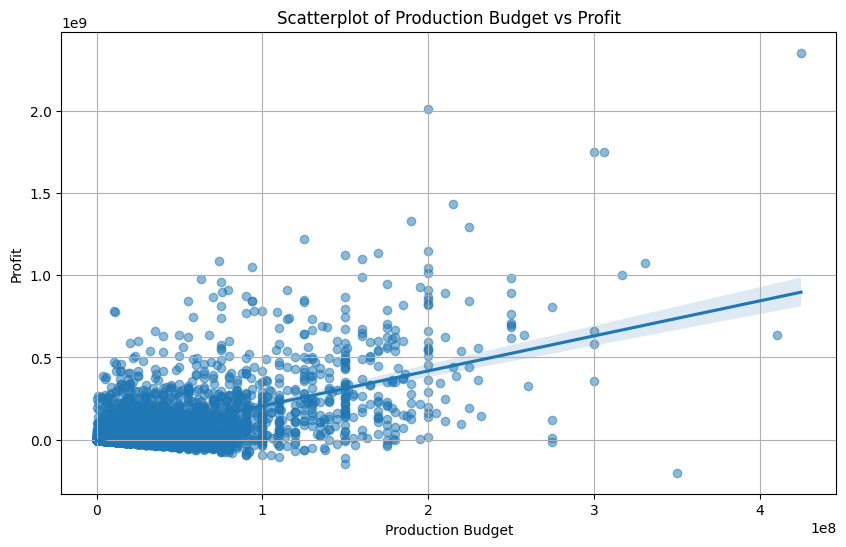

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create scatterplot with trendline
plt.figure(figsize=(10, 6))
sns.regplot(x='production_budget', y='profit', data=df_movie_budget, scatter_kws={'alpha':0.5})
plt.title('Scatterplot of Production Budget vs Profit')
plt.xlabel('Production Budget')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

Positive Relationship: There appears to be a positive correlation between production_budget and profit. As the production budget increases, the profit tends to increase as well. This suggests that investing more in the production of a movie can potentially lead to higher profits.

PART TWO OF QUESTION 1

A barplot between the adjusted profit and adjusted budget.

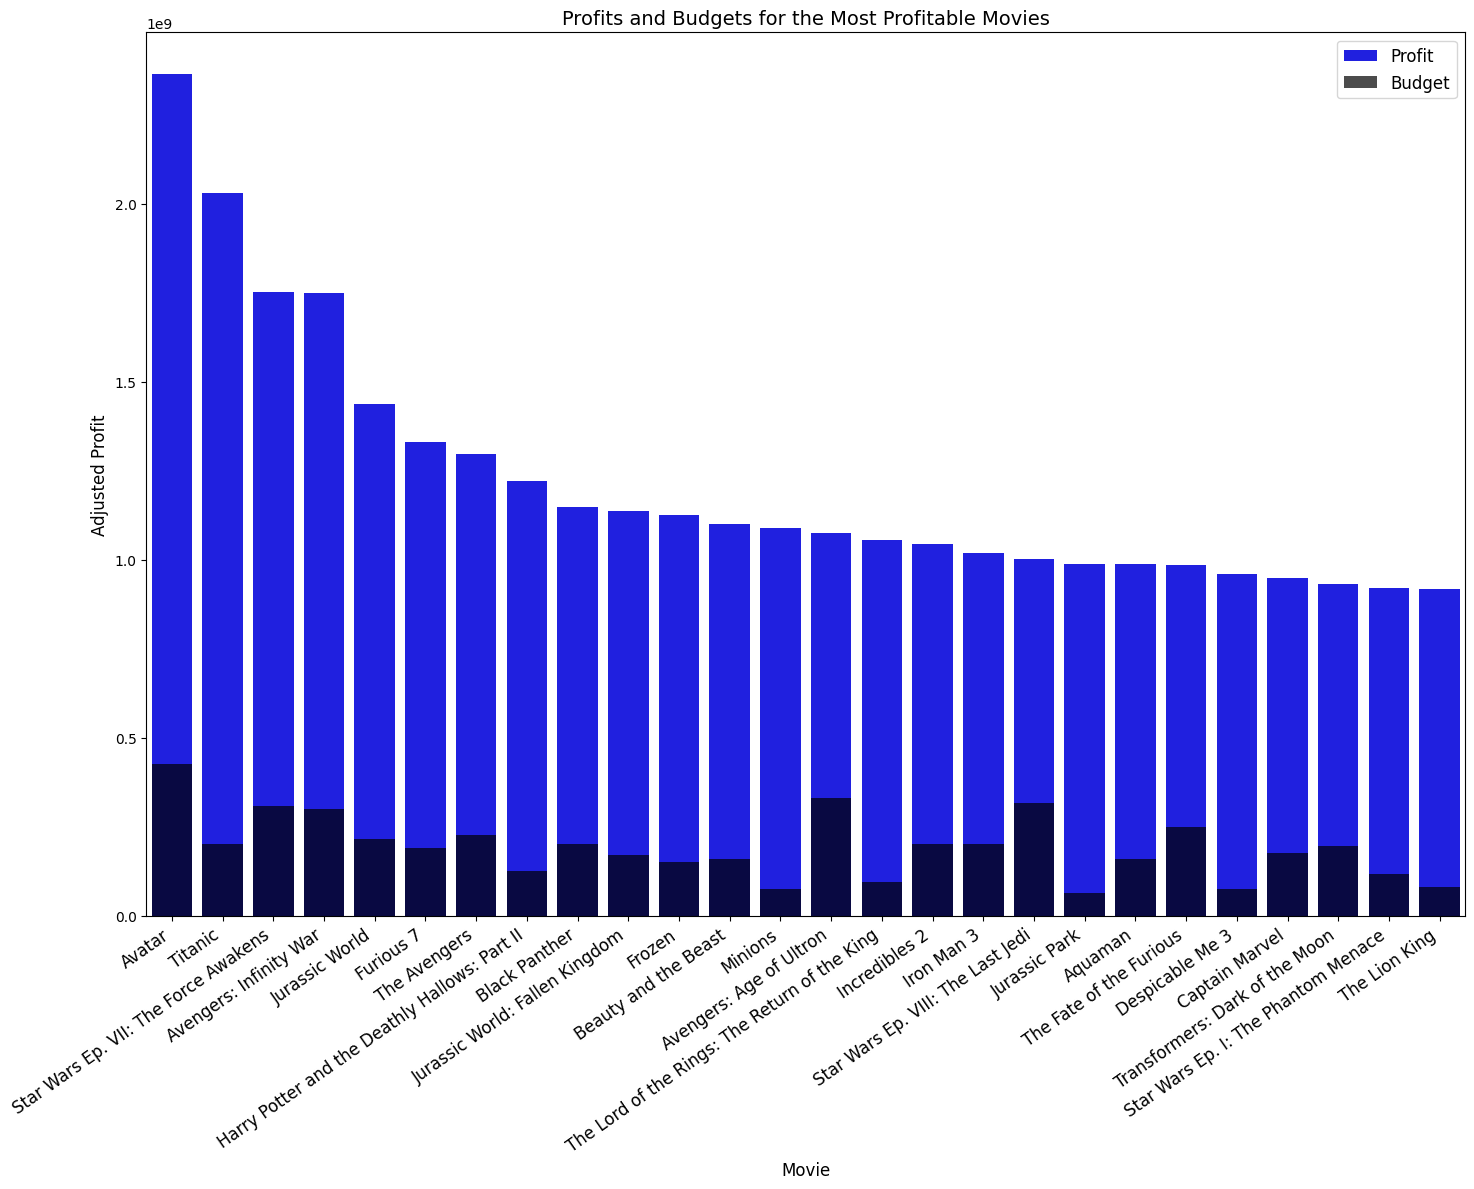

In [15]:
plt.figure(figsize=(15, 12))

# Plot adjusted profit
sns.barplot(x=profitable_ranked_df.loc[0:25, 'movie'], y=profitable_ranked_df.loc[0:25, 'adjusted_profit'], 
            color='blue', label='Profit')

# Plot adjusted budget
sns.barplot(x=profitable_ranked_df.loc[0:25, 'movie'], y=profitable_ranked_df.loc[0:25, 'adjusted_budget'], 
            color='black', alpha=0.7, label='Budget')

plt.xlabel('Movie', fontsize=12)
plt.ylabel('Adjusted Profit', fontsize=12)
plt.title("Profits and Budgets for the Most Profitable Movies", fontsize=14)
plt.xticks(rotation=35, horizontalalignment='right', fontsize=12)
plt.legend(fontsize=12)

plt.tight_layout()
plt.savefig('ProfitBudgetTop25.png')
plt.show()

Avatar,Titanic, Star Wars Ep. VII:The Force Awakens are the most profitable movies.

Question 2: Which movie genres are most commonly produced

First we need to check for any missing data and drop the values and also check for duplicates in the data df_movie_info 

In [16]:
df_movie_info.isnull().sum().duplicated()

id              False
synopsis        False
rating          False
genre           False
director        False
writer          False
theater_date    False
dvd_date         True
currency        False
box_office       True
runtime         False
studio          False
dtype: bool

In [17]:
df_movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


After dropping the rows with missing values, split the genres  using the '|' separator and creates a list of all individual genres present in the dataset

After creating the list of all genres, the code uses pd.Series.value_counts() to count the occurrences of each genre in the all_genres list, creating a Series genre_counts where each genre is the index and its count is the value.

Finally, the code generates a bar plot (histogram) of the genre frequencies using genre_counts.plot(kind='bar', color='skyblue'). This provides a visual representation of how frequently each genre appears in the dataset.

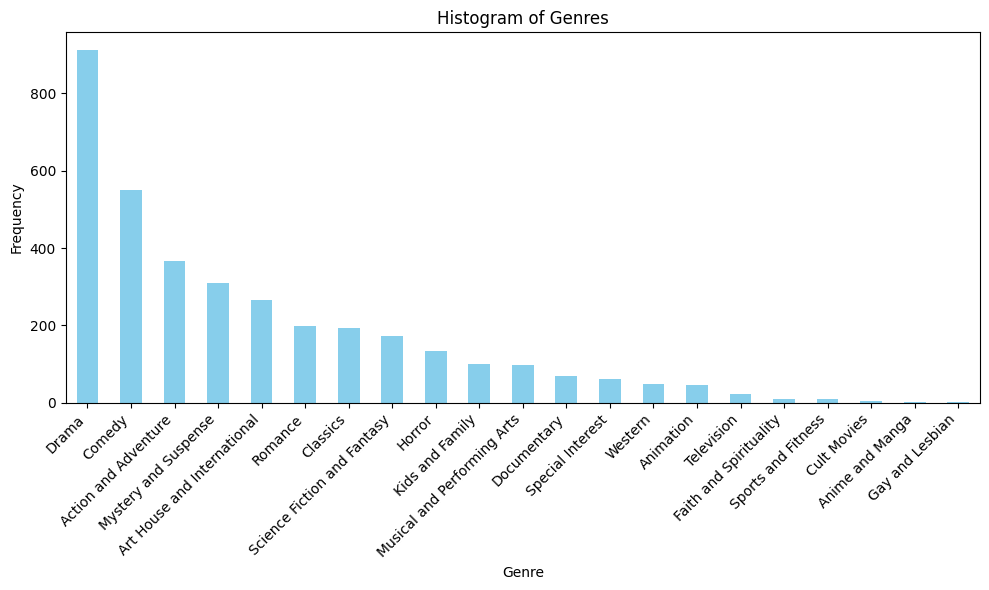

In [18]:
# Drop rows with missing genre values
df_movie_info.dropna(subset=['genre'], inplace=True)

# Split the genres and create a list of all genres
all_genres = []
for genres in df_movie_info['genre'].str.split('|'):
    all_genres.extend(genres)

# Count the occurrences of each genre
genre_counts = pd.Series(all_genres).value_counts()

# Plot the histogram
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Histogram of Genres')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend
plt.show()

Drama,comedy, Action and Adventure are the most commonly produced. Microsoft should produce more drama, action,and comedy movie genres to gain more profit.